## Statistical Methods in Python For Rare Event Searches

*Summer Course at Canfranc Underground Laboratory (LSC) July 2019*

### Lecture VI

## Introduction to Bayes' Approach to Hypothesis Testing

*Author: Jose A. Hernando*, June 2019

*Instituto Galego de Altas Enerxías. Universidade de Santiago de Compostela, Spain.*

In [1]:
import time

print( ' Last Execution ', time.asctime())

 Last Execution  Mon Jul  1 10:21:36 2019


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

# possible styles: ggplot (simplicity), bmh (scientify data), 
plt.style.context('seaborn-colorblind')


import htcore as htcore
import httoys as httoys

# ploting images
from IPython.display import display, Image

----

## Introduction

Usually we indicate that a given parameters $\mu$ (i.e half-lifetime) has an upper limit at 90 % CL  (i.e. $1.7 10^{27}$ y at 90 %CL is the resulto of KamLAND-ZEN).

Sometimes we quote an interval for the parameter $\mu$ as a **confidence interval** (CI) with a **confidence level** (CL) range.

But what does it mean? In fact, it means very different things for a frequentist and a bayesian!

And... how are they computed?

---

## I. Bayesian Credible Intervals

Bayesians provide a *credible integral* at a $\beta$ CL. The probability to find the true value inside the CI is $\beta$.

To obtain the CI, bayesians need the pdf $g(x | \mu)$, and  the prior probability of the relevant parameter, $\pi(\mu)$. In most cases, this prior is unknown, and they are forced to take a 'reasonable' prior. Using the Bayes' theorem we can compute the *posterior probability*:

$$
p(\mu | x) = \frac{g(x |\mu) \, \pi(\mu)}{p(x)}
$$

The denomiator, is in facto the probiblitity for all posible hypotheses, $\mu$, that is:

$$
p(\mu | x) = \frac{p(x |\mu) \, \pi(\mu)}{\int p(x | \mu) \pi(\mu) \mathrm{d}\mu}
$$


### Example: low stats poisson

Consider the case of a counting experiment with $b$ background events ($b$ is known) and expect a signal $s$ on top. If one measures $n$, the posterior probability for $s$ is:

$$
p(b + s | n) = \frac{p(n | b + s) \,\pi(s)}{\int_s p(n | b+s) \pi(s)}
$$

To get the upper limit CI at $\beta$ CL, we integrate the posterior till the upper value, $s_u$, to get a total probability $\beta$.

$$
\int_{0}^{s_u} p(b + s | n)  = \beta
$$


We can take a 'reasonable' prior on $s$ (as a constant if $s>0$)
$$
\pi(s) = \left\{ \begin{array}{ll} 
1 & \mbox{if $s \ge 0$} \\
0 & \mbox{if $s \lt 0$}
\end{array} \right.
$$

The likelihood is
$$
p(n | b, s) = \frac{(b+s)^n e^{-(b+s)}}{n!} = \Gamma(b+s,n+1,1)
$$
where, $\Gamma(x, \alpha, \beta)$ is the gamma distribution. 

The case $b=0$, the denominator is 1, and the numerator, reduces to:
$$
\int_{0}^{s_u} \Gamma(s, n+1, 1) \mathrm{d}s = \beta
$$

For a value of $b$, we need to solve:
$$
\frac{\int_{0}^{s_u} \Gamma(b+s, n+1, 1) \mathrm{d}s}{\int_{0}^{\infty} \Gamma(b+s, n+1, 1) \mathrm{d}s} = \beta
$$
That can be computed with the change $u=s+b$.

**Example:** Compute the upper limit, $s_u$, using Bayes' CI at 90% CL for different values of $b$ and $n$ observations.

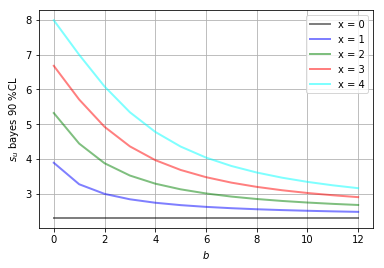

In [3]:
beta, ndim, nobs = 0.90, 13, 5
bs = np.arange(ndim)
ns = np.arange(nobs)

colors = 4*['black', 'blue', 'green', 'red', 'cyan']
for ni in ns:
    color = colors[ni]
    cbs = np.array([stats.gamma.cdf(bi, ni+1) for bi in bs])
    betaps = beta*(1-cbs)+cbs
    ss = np.array([stats.gamma.ppf(betapi, ni+1)-bi for bi, betapi in zip(bs, betaps)])
    plt.plot(bs, ss, color=color, lw=2, alpha=0.5, label=r'x = {:d}'.format(ni))
plt.xlabel(r'$b$'); plt.grid();
plt.ylabel(r'$s_u$ bayes {:d} %CL'.format(int(100*beta)));
plt.legend();

---

## 2 Hypothesis testing

Let's now consider hypothesis testing through Bayesian statistics.
We want now to compute:

$$
p(H_1 \, | \, x), \, p(H_0 \, | \, x)
$$

the probability (degree of belief) of the $H_1, \; H_0$ hypothesis if we measure $x$.

Using Bayes' theorem, the probability of an hypothesis is:
$$
p(H \, | \, x ) = \frac{p(x \, |\,  H) \pi(H)}{p(x)} 
$$

Where $\pi(H)$, is the prior probability (degree of belief) of $H$. And,  $p(x)$, the probability to get the data considering all hypothesis, that is $p(x) = \sum_i p( x \, | \, H_i) \, \pi(H_i)$, the sum over the probability of getting that data over all the possible hypothesis.


In general, with a Bayesian treatement, we proceed in the following steps:
1. Estimate the priors of the relevant, $\mu$, parameters, the nuisance, $\theta$ paremeters, $\pi(\mu, \theta | H)$ and the hypothesis prior, $\pi(H)$, for all hypothesis. We will then marginalize the pdfs respect the parameters.
$$
p( x \, | \, H) = \int p(x \, | \, \mu, \theta, H) \, \pi(\mu, \theta \, | \, H) \mathrm{d} \mu \, \mathrm{d} \theta
$$
3. And the compute the probability of each hypothesis, using Bayes' theorem:
$$
p(H \, | \, x) = \frac{ p(x \, | \, H) \, \pi(H)}{\sum_i p(x \, | \, H_i) \, \pi(H_i)}
$$

A convenient quantity if the ratio of probabilities:
$$
\frac{ p(H_1 | x)}{ p(H_0 | x) } = \frac{ p(x | H_1)}{ p(x | H_0)} \, \frac{\pi(H_1)}{\pi(H_0)}
$$
where the first factor in the left side of the equation is the **Bayers factor**, 
$$
\frac{ p(x | H_1)}{ p(x | H_0)}
$$
that tells how much the measurement changes the prior ratio of probabilities between the hypothesis. It can be reinterpreted as $Z$ sigmas in the frequentist approach using the relation:
$$
Z = \log(B_{10}) \sqrt{2 B_{10}}
$$


And finally we compute:
1. The posterior probability of $H$. If there is a continuous hypothesis given by the strength $\mu$, we compute the posterior probability: $p(\mu \, | x)$. 
2. The confidence level intervals for the relevant parameters (see chapter on CL). In the case of continous hypothesis the CL of $\mu$.
3. The Bayes factor with respect the null hypothesis. $B_{10}(\mu)$

Let's consider two examples: a counting experiment with known background, and a second one where the background is estimated using a control region.


### Example: counting experiment

Consider the case of a counting experiment that expects $b$ background events, and a possible signal $s$ with an unknown strength $\mu s$. Consider that $b, \, s$ are known. 

The likelihood function is a poisson with mean $b+\mu s$, there is no nuisance parameters, as $b$ is known (in case you can include a delta $\pi(b) = \delta(b-b_0)$, where $b_0$ is the known background value). 

$$
f(n \, | \mu) = \frac{(b+\mu s)^n \, e^{-(b+\mu s)}}{n!}
$$

In order to compute the posterior probability we need the prior for $\mu$, $\pi(\mu)$, that to reflect our ingnorance we take as $\pi(\mu)=1$. The posterior is just simple:

$$
f(\mu | n) = \frac{p( n | \mu) \, \pi(\mu)}{ \int p(n | \mu) \pi(\mu) \mathrm{d}\mu}
$$
that is:
$$
f(\mu | n) \propto \frac{(b+\mu s)^n \, e^{-(b+\mu s)}}{n!}
$$
That we interprect as a $\Gamma(b+\mu s, n+1, 1)$ distribution. Remember:
$$
\Gamma(x , \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha) x^{\alpha-1} e^{-\beta x}}
$$
where $\Gamma(\alpha)$ is the Gamma function, the extension to real number of the factorial (i.e $\Gamma(n) = (n-1)!$).

From the posterior we can compute the confidence level (see chapter on CL).

The Bayes factor, comparing a hypothesis $\mu$, with respect the null $\mu=0$ is:

$$
B_{10} = \frac{f(n | b + \mu s)}{ f(n | b)} = \frac{(b+\mu s)^n}{b^n} e^{-\mu s}
$$



**Example:** Consider an experiment that expects: $b=1$ and $s=8$ and measurement $n=8$.  Compute $p(\mu | n)$, the 90% CL interval of $\mu$, and the bayes factor for $\mu=1$.

integral pmu : 1.00 
CL interval 95 % : [3.123, 14.751] 
CL interval 90 % : [3.700, 13.429] 
CL interval 68 % : [5.069, 10.931] 
Bayes factor B10 for s : 1.44e+04,  5.14 sigmas


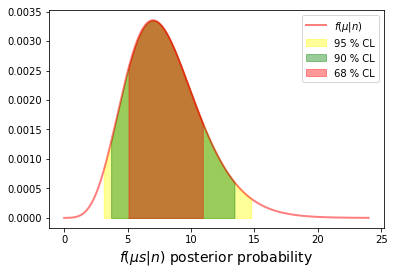

In [4]:
b, s = 1, 8
n = 8

fig, ax = plt.subplots(figsize=(6, 4))

mus = np.linspace(0., 3., 1000)
dmu = mus[1]-mus[0]
pmus = s*dmu*np.array([stats.gamma.pdf(b+mui*s, n+1) for mui in mus])
print('integral pmu : {:4.2f} '.format(np.sum(pmus)))

# plot the p(mu |n)
ax.plot(s*mus, pmus, alpha=0.5, color='red', lw=2, label='$f(\mu|n)$')
ax.set_xlabel('$f(\mu s|n)$ posterior probability', fontsize=14)

# compute CL
#def cl_central(mus, pmus, clval):
def cl_interval(mus, pmus, clval=68.):
    xval = (1-clval/100.)/2.
    nmus = len(pmus)
    s0s = np.array([np.sum(pmus[0:i+1]) for i in range(0, nmus)])
    s1s = np.array([np.sum(pmus[i:]) for i in range(0, nmus)])
    # ax.plot(mus, s0s, color='blue')
    # ax.plot(mus, s1s, color='black')
    i0s = [i for i in range(nmus) if s0s[i] < xval]
    ilow = 0
    if (len(i0s) > 0):
        ilow = i0s[-1]+1
    i1s = [i for i in range(1, nmus) if s1s[i] < xval]
    iup = nmus-1
    if (len(i1s) >0):
        iup = i1s[0]-1
    #print ilow, mus[ilow], s0s[ilow-1], s0s[ilow]
    #print iup, mus[iup], s1s[iup], s1s[iup+1]
    return ilow, iup

colors = ['yellow', 'green', 'red']
for i, cl in enumerate([95., 90., 68.]):
    color = colors[i]
    i0, i1 = cl_interval(mus, pmus, cl)
    print('CL interval {:d} % : [{:5.3f}, {:5.3f}] '.format(int(cl), s*mus[i0], s*mus[i1]))
    ax.fill_between(s*mus[i0:i1+1], 0., pmus[i0:i1+1], color=color, alpha=0.4,  
                     label='{:d} % CL'.format(int(cl)))

ax.legend()
# bayes factor
b10 = stats.poisson.pmf(n, b+s)/stats.poisson.pmf(n, b)
zb10 = np.log(np.sqrt(2*b10))
print('Bayes factor B10 for s : {:4.2e}, {:5.2f} sigmas'.format(b10, zb10))



### Example: counting experiment with control region

Consider now a counting experiment that expects $b+\mu s$ events in the signal region and $\tau \, b$ events in the control region. $s, \tau$ are know. 

Here the nuisance parameter is $b$, as $\tau$, and the relevant parameter is $\mu$. The pdf distributions are, for the control region, a poisson with mean $\tau b$ and for the signal region, a second poisson with mean $b+\mu s$, with $\mu=0$ for $H_0$ and $\mu=1$ for $H_1$.  


First, se compute $p( n | \mu s, H_\mu)$, for that we marginalize the nuisance parameter, with the prior $\pi(b)$.

$$
p (n | \mu s ) = \int p(n | b+\mu s) \, \pi(b) \mathrm{d}b
$$

Where:
$$
p(n | b+ \mu s) = \frac{(b+\mu s)^n \, e^{-(b+s)}}{ n!}
$$
$n$ is poisson distributed with mean $b+\mu s$

Now, $\pi(b)$, the prior, based on the measurement of $m$ events in the control region. For that we can use: 
$$
\pi(b | \, m)  = \frac{(\tau b)^m \, e^{-\tau b}}{ m!} = \Gamma(\tau b, m+1, 1)
$$

$\Gamma(x, \alpha, \beta)$ (with $x, \alpha, \beta$ defined positive) is the gamma distribution. It is usefull when dealing with parameters estimation based on poisson distributions, as is the case.

After some calculations, we get:
$$
p( n | \mu s) = \frac{1}{m} \frac{\tau^2}{(1+\tau)^2} \sum_{r=0}^n \beta \left(\frac{1}{1+\tau}, r+1, m \right) \, \mathrm{p}(n-r | \mu s) 
$$

where $p(n-r| \mu s)$ is the likelihood of a poisson distribution with mean $\mu s$ with and measurement $n-r$.
And $\beta(x, \alpha, \beta)$ (with $p \in [0.,1]$ anad $\alpha, \beta$ defined positive) is the beta distribution:
$$
\beta(p, \alpha, \beta) = \frac{\Gamma (\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} p^{\alpha-1} (1-p)^{\beta-1}
$$
The $\beta$ distribution is associated with the estimation of a probability $p$. Notice for example that the case $\alpha=1, \, \beta=1$ is a uniform distribution in $p$.

Now we can compute the probability of each hypothesis (for $\mu s$ given the data $n, m$):
$$
p(\mu s | n, m ) = \frac{p(n | \mu s) \, \pi(\mu s)}{ \int_\mu p(n | \mu s) \pi(\mu s)}
$$

If we take a flat prior, $\pi(\mu s) = 1$, to reflect our absence  of "information", we get the posterior probability:

$$
p(\mu s | n, m ) = \frac{\sum_{r=0}^n \beta(\frac{1}{1+\tau}, r+1, m) \mathrm{p}( n-r | \mu s)} {\sum_{r=0}^n \beta(\frac{1}{1+\tau}, r+1, m)} 
$$



**Example:** Consider the case $s=8$, a control region with $\tau=10$, and a measurement $n=8$ in the signal region and $10$ in the control region. Compute $p(\mu | n, m)$

tau, signal  10.0 8.0
m, n  10 8
 integral prior 1.00
CL interval 95 % : [0.556, 1.818] 
CL interval 90 % : [0.606, 1.717] 
CL interval 68 % : [0.758, 1.414] 
 integral posterior 1.00
CL interval 95 % : [1.939, 17.212] 
CL interval 90 % : [2.424, 16.000] 
CL interval 68 % : [3.394, 13.818] 


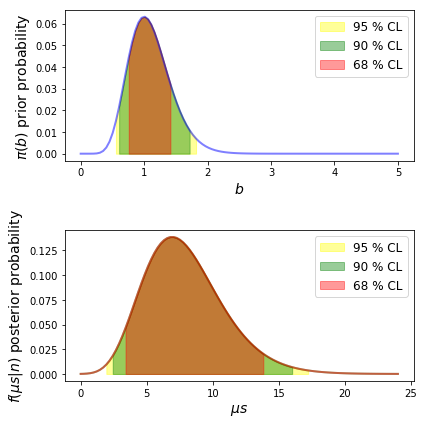

In [5]:
tau, s = 10., 8.

m, n = 10, 8

def ptaub(b, m, tau):
    return stats.gamma.pdf(tau*b, m+1)

def pnmu(mu, n, m, tau, s):
    ptau = 1./(1.+tau)
    bs = np.array([stats.beta.pdf(ptau, r+1, m) for r in range(0, n+1)])
    ps = np.array([stats.poisson.pmf(n-r, mu*s) for r in range(0, n+1)])
    val = ((1.-ptau)*(1.-ptau)/(1.*m))*np.sum(bs*ps)
    return val

def pmu(mu, n, m, tau, s):
    ptau = 1./(1.+tau)
    bs = np.array([stats.beta.pdf(ptau, r+1, m) for r in range(n+1)])
    ps = np.array([stats.poisson.pmf(n-r, mu*s) for r in range(n+1)])
    val = np.sum(bs*ps)/np.sum(bs)
    return val

fig, axs = plt.subplots(2, 1, figsize=(6, 6))
ax0, ax1 = axs.ravel()

print('tau, signal ', tau, s)
print('m, n ', m, n)

# plot the b prior
xbs = np.linspace(0., 5., 100)
db = xbs[1]-xbs[0]
pbs = tau*db*np.array([ptaub(bi, m, tau) for bi in xbs])
print(' integral prior {:4.2f}'.format(np.sum(pbs)))
ax0.plot(xbs, pbs, color='blue', alpha=0.5, lw=2)
ax0.set_xlabel(r'$b$', fontsize=14)
ax0.set_ylabel(r'$\pi(b)$ prior probability ', fontsize=14)

for i, cl in enumerate([95., 90., 68.]):
    color = colors[i]
    i0, i1 = cl_interval(xbs, pbs, cl)
    print('CL interval {:d} % : [{:5.3f}, {:5.3f}] '.format(int(cl), xbs[i0], xbs[i1]))
    ax0.fill_between(xbs[i0:i1+1], 0., pbs[i0:i1+1], color=color, alpha=0.4,  
                     label='{:d} % CL'.format(int(cl)))
ax0.legend(fontsize=12)

mus = np.linspace(0., 3., 100)
dmu = mus[1]-mus[0]
pnmus = np.array([pnmu(imu, n=n, m=m, tau=tau, s=s) for imu in mus])
pmus = np.array([pmu(imu, n=n, m=m, tau=tau, s=s) for imu in mus])
print(' integral posterior {:4.2f}'.format(np.sum(pmus)*dmu*s))
ax1.plot(s*mus, pnmus, color='green', alpha=0.5, lw=2)
ax1.plot(s*mus, pmus, color='red', alpha=0.5, lw=2)

colors = ['yellow', 'green', 'red']
for i, cl in enumerate([95., 90., 68.]):
    color = colors[i]
    i0, i1 = cl_interval(mus, pmus, cl)
    print('CL interval {:d} % : [{:5.3f}, {:5.3f}] '.format(int(cl), s*mus[i0], s*mus[i1]))
    ax1.fill_between(s*mus[i0:i1+1], 0., pmus[i0:i1+1], color=color, alpha=0.4,  
                     label='{:d} % CL'.format(int(cl)))
ax1.set_xlabel('$\mu s$', fontsize=14)
ax1.set_ylabel('$f(\mu s | n)$ posterior probability', fontsize=14)
ax1.legend(fontsize=12)

fig.tight_layout()
fig.savefig('figs/ht_bayesian_approach.png')

**Exercise:** Compare the results with the Bayesian method, and the frequentist using the profile likelihood ratio as test statistic.

**Exercise:** The previous experiment does two measurments: $m_1=10, n_1 = 8$ and $m_2 = 9, n_2 = 9$, compute the bayesian posterior probability $p(\mu s | x)$ and the bayes factor for $\mu=1$.